<a href="https://colab.research.google.com/github/merdogan97/DVwPy/blob/main/DV_CapStone_Project_12_02_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


# **1.Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")
%matplotlib inline
import scipy

import warnings
warnings.filterwarnings("ignore")

# **2.Read dataset**

In [ ]:
df= pd.read_csv("/content/store_sharing.csv")

# **3.Check missing values and if there are any dublicate rows or not.**

In [ ]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(17414, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [ ]:
df.isnull()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
17409,False,False,False,False,False,False,False,False,False,False
17410,False,False,False,False,False,False,False,False,False,False
17411,False,False,False,False,False,False,False,False,False,False
17412,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [ ]:
df.isnull().count()

timestamp       17414
cnt             17414
t1              17414
t2              17414
hum             17414
wind_speed      17414
weather_code    17414
is_holiday      17414
is_weekend      17414
season          17414
dtype: int64

# **4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)**

In [ ]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
df.season.unique()

array([3., 0., 1., 2.])

In [ ]:
df.groupby(df["season"]).sum().index

Float64Index([0.0, 1.0, 2.0, 3.0], dtype='float64', name='season')

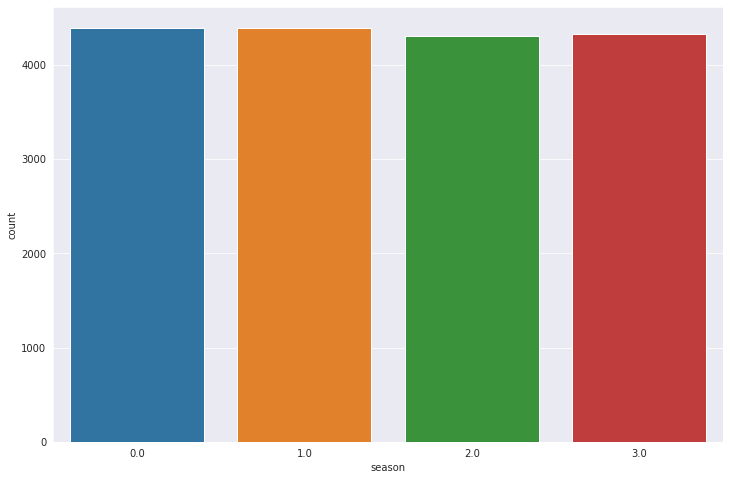

In [ ]:
# season
plt.figure(figsize=(12, 8)) 
sns.countplot(x="season", data=df)
plt.show()

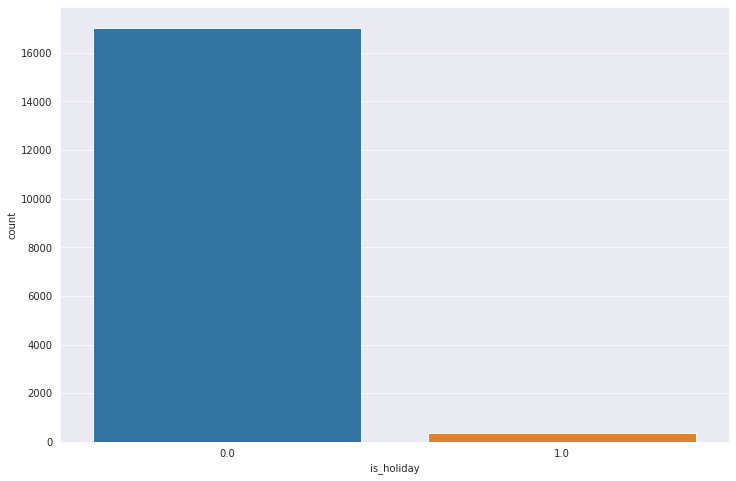

In [ ]:
# is_holiday:
plt.figure(figsize=(12, 8)) 
sns.countplot(x="is_holiday", data=df)
plt.show()


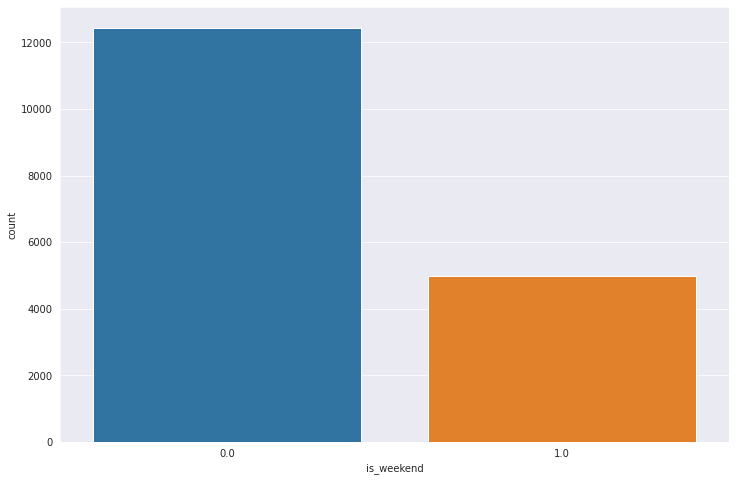

In [ ]:
# is_weekend
plt.figure(figsize=(12, 8)) 
sns.countplot(x="is_weekend", data=df)
plt.show()

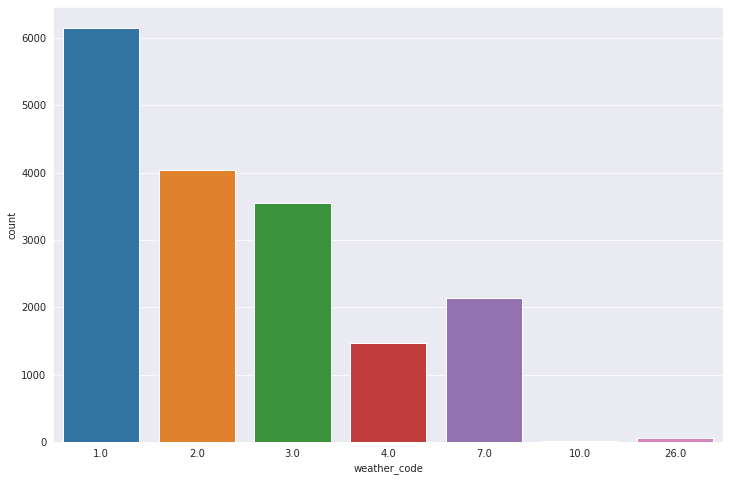

In [ ]:
# weather_code
plt.figure(figsize=(12, 8)) 
sns.countplot(x="weather_code", data=df)
plt.show()

# **5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.**

In [ ]:
df.timestamp

0        2015-01-04 00:00:00
1        2015-01-04 01:00:00
2        2015-01-04 02:00:00
3        2015-01-04 03:00:00
4        2015-01-04 04:00:00
                ...         
17409    2017-01-03 19:00:00
17410    2017-01-03 20:00:00
17411    2017-01-03 21:00:00
17412    2017-01-03 22:00:00
17413    2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: object

In [ ]:
pd.to_datetime(df.timestamp)            # datetime 64' e çevirdik

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]

In [ ]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [ ]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [ ]:
# df["years"]= df.timestamp.dt.year

In [ ]:
# df["month"]= df.timestamp.dt.month


In [ ]:
# df["days"] = df.timestamp.dt.day_name()   


In [ ]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [ ]:
df.reset_index(drop= True, inplace=True)    
df.set_index("timestamp", drop= True,inplace=True)
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

# **6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)**

In [ ]:
from datetime import timedelta

In [ ]:
from datetime import datetime

In [ ]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


you can use strftime('%Y-%m') for year_mount

In [ ]:
datetime.now()

datetime.datetime(2022, 2, 11, 16, 38, 56, 97096)

In [ ]:
datetime.today()

datetime.datetime(2022, 2, 11, 16, 38, 56, 110976)

In [ ]:
current_datetime = datetime.today()

In [ ]:
current_datetime.date()

datetime.date(2022, 2, 11)

In [ ]:
current_datetime.year

2022

In [ ]:
current_datetime.weekday()

4

In [ ]:
current_datetime.isoweekday()

5

In [ ]:
current_datetime.strftime("%Y")      

'2022'

In [ ]:
year = current_datetime.strftime("%Y")
print("year:", year)
month = current_datetime.strftime("%m")
print("month:", month)
day = current_datetime.strftime("%d")
print("day:", day)
time = current_datetime.strftime("%H:%M:%S")
print("time:", time)
date_time = current_datetime.strftime("%m/%d/%Y, %H:%M:%S")
print("date and time:",date_time)

year: 2022
month: 02
day: 11
time: 16:38:56
date and time: 02/11/2022, 16:38:56


In [ ]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In [ ]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,19,3,1,1
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,20,3,1,1
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,21,3,1,1


# **7.Visualize the correlation with a heatmap**

In [ ]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,19,3,1,1
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,20,3,1,1
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,21,3,1,1


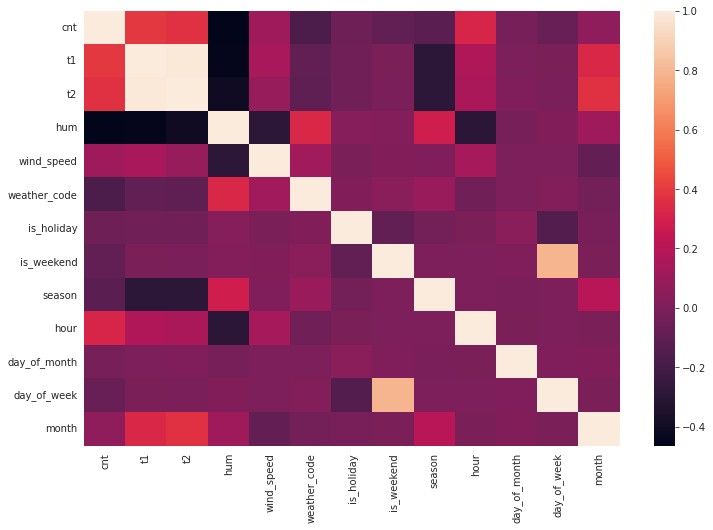

In [ ]:
# for all variables 
plt.figure(figsize=(12, 8)) 
sns.heatmap(data=df.corr());

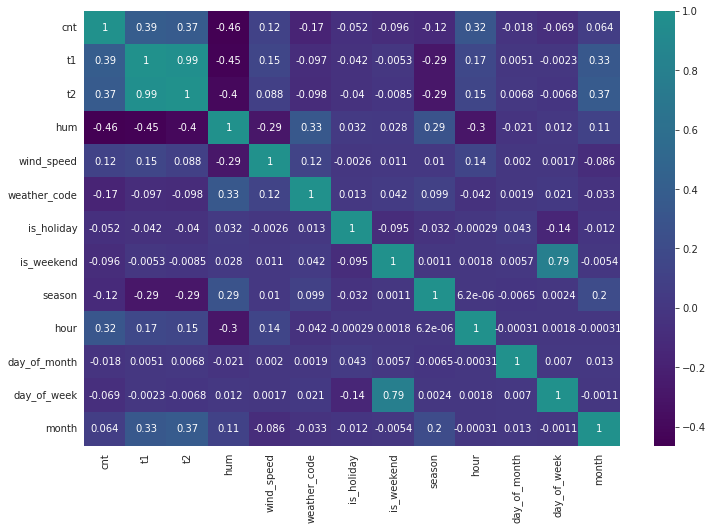

In [ ]:
# for the target variable
plt.figure(figsize=(12, 8)) 
sns.heatmap(data=df.corr(), cmap='viridis', annot=True, center=1);

# **8. Visualize the correlation of the target variable and the other features with barplot**

In [ ]:
#with pandas


# **9.Plot bike shares over time use lineplot**

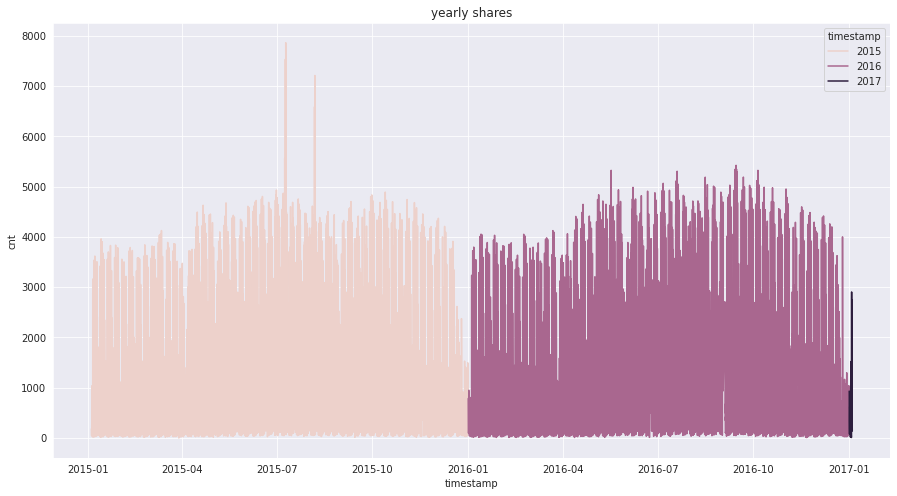

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(df.index,'cnt',data=df,hue=df.index.year
             )
plt.title('yearly shares')
plt.show()

In [ ]:
x = df.cnt
y = df.season

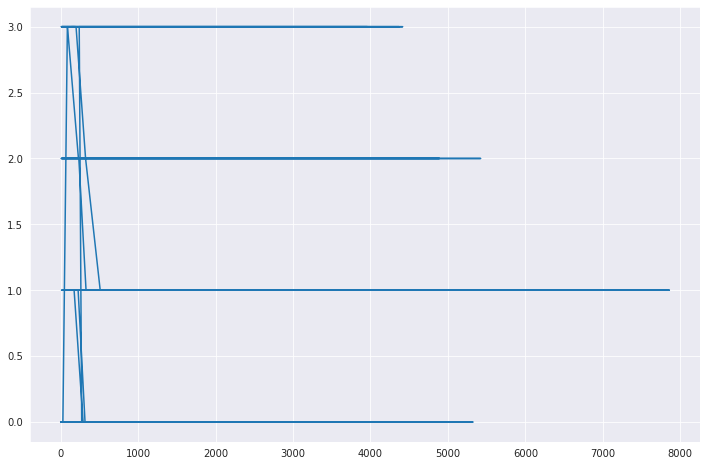

In [ ]:
plt.figure(figsize=(12, 8)) 
plt.plot(x, y)
plt.show()

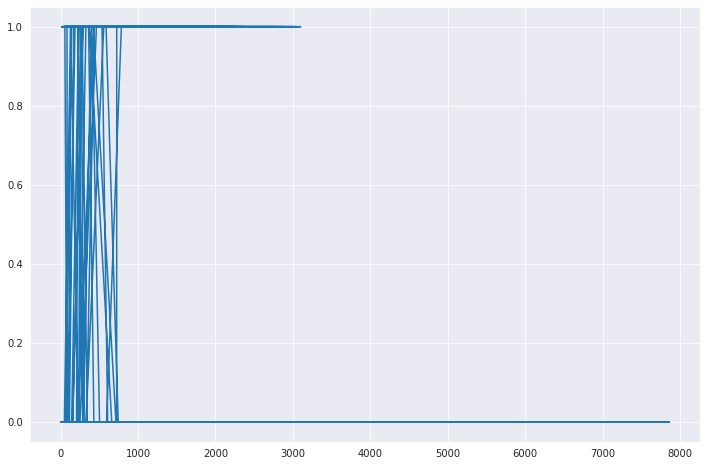

In [ ]:
x = df.cnt
y = df.is_holiday	
plt.figure(figsize=(12, 8)) 
plt.plot(x,y)
plt.show()

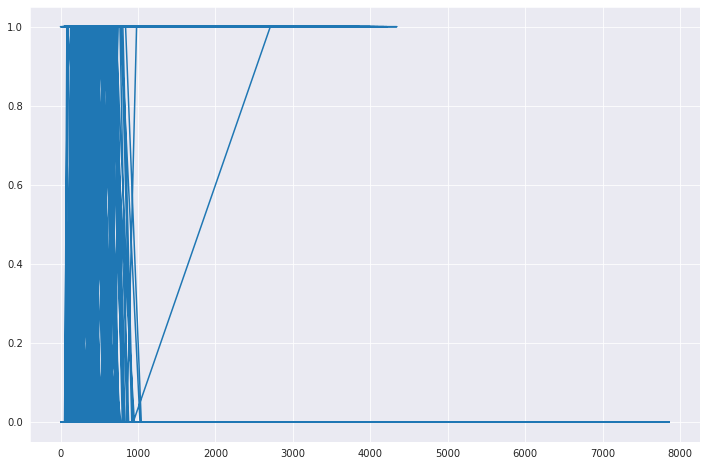

In [ ]:
x = df.cnt
y = df.is_weekend
plt.figure(figsize=(12, 8)) 
plt.plot(x,y)
plt.show()

# **10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)**

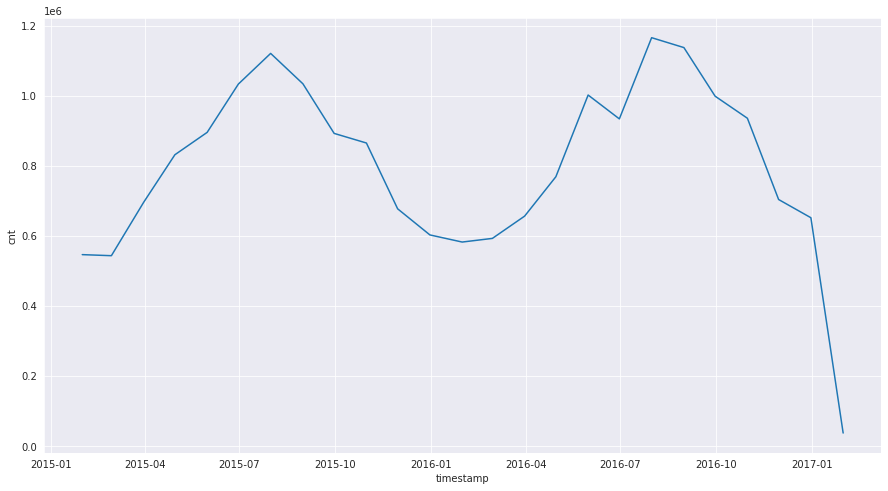

In [ ]:
# with lineplot
df_by_month = df.resample('M').sum()
plt.figure(figsize=(15,8))

sns.lineplot(x=df_by_month.index, y="cnt", data=df_by_month);

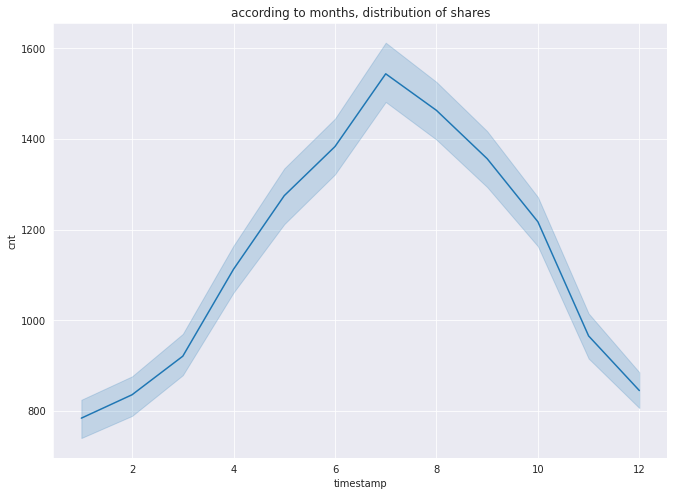

In [ ]:
# with lineplot
plt.figure(figsize=(11,8))
sns.lineplot(df.index.month,'cnt',data=df)
plt.title('according to months, distribution of shares')
plt.show()

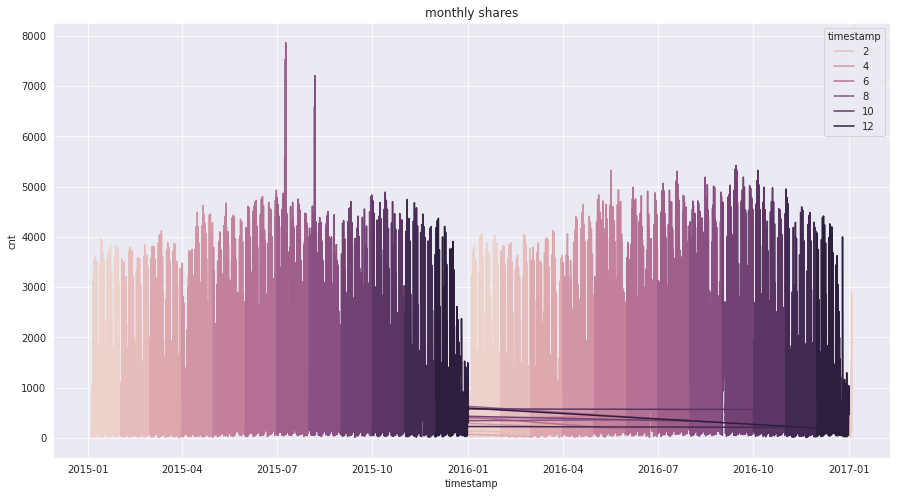

In [ ]:
# with lineplot
plt.figure(figsize=(15,8))
sns.lineplot(df.index,'cnt',data=df,hue=df.index.month)
plt.title('monthly shares')
plt.show()

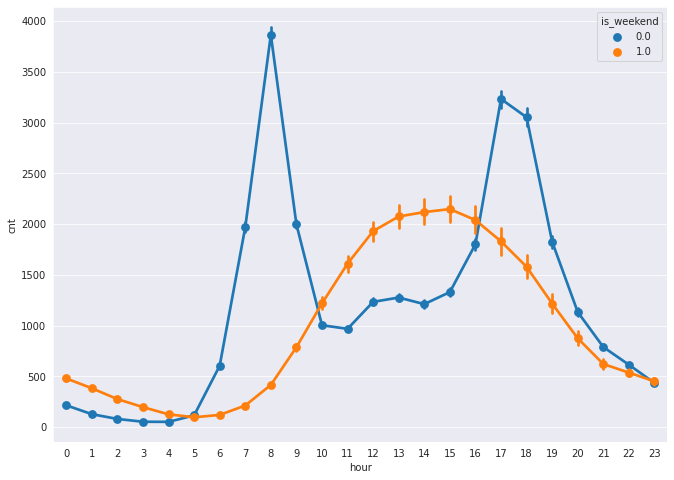

In [ ]:
plt.figure(figsize=(11,8))
sns.pointplot(x="hour", y="cnt", hue="is_weekend", data=df);

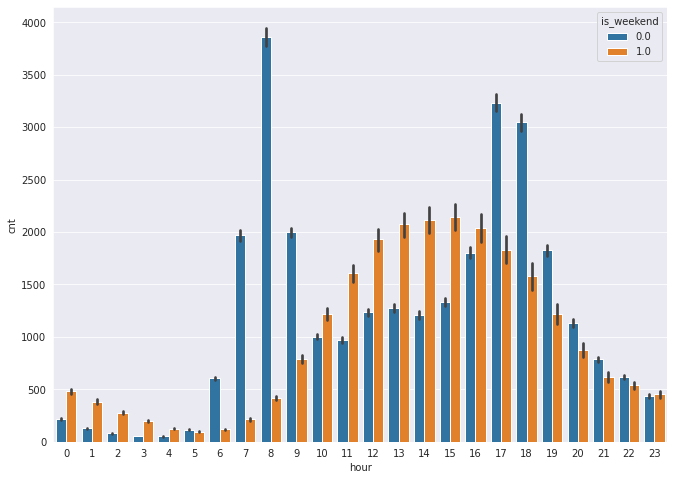

In [83]:
plt.figure(figsize=(11,8))
sns.barplot(x="hour", y="cnt", hue="is_weekend", data=df);

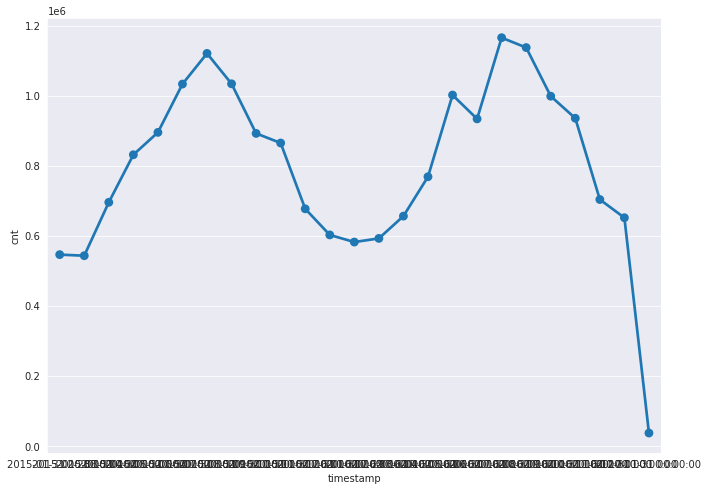

In [84]:
# with pointplot
plt.figure(figsize=(11,8))
sns.pointplot(x=df_by_month.index, y="cnt", data=df_by_month);

In [ ]:
# with barplot


In [ ]:
plt.figure(figsize=(11,8))
ax = sns.barplot(df.index,'cnt', data=df, hue=df.index.month)
plt.title('shares on is_weekend by seasons')

# **11.Plot bike shares by hours on (holidays, weekend, season)**

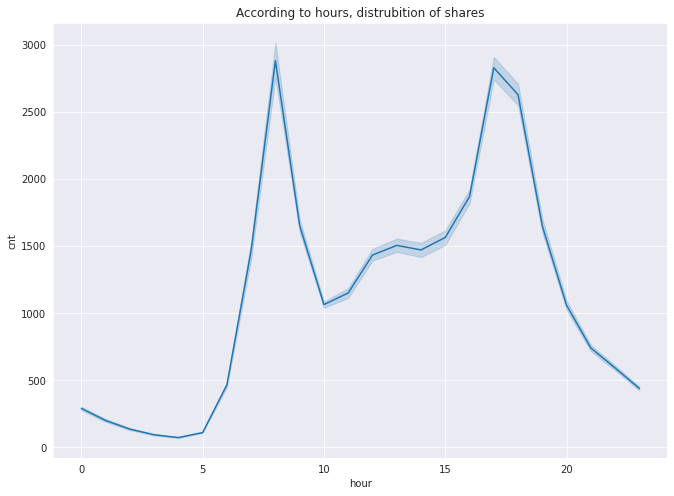

In [ ]:
# with lineplot (*You may want to see seasonal breakdowns*)
plt.figure(figsize=(11,8))
sns.lineplot('hour','cnt',data=df)
plt.title('According to hours, distrubition of shares')
plt.show()

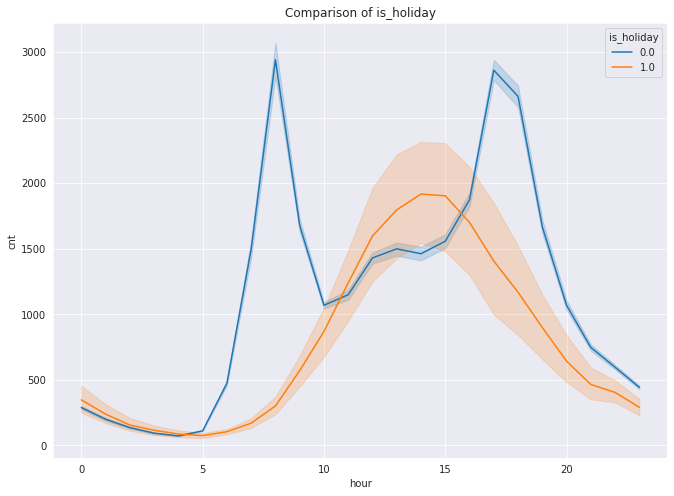

In [ ]:
# with lineplot (*whether it is a holiday or not*)
plt.figure(figsize=(11,8))
sns.lineplot('hour','cnt',data=df,hue='is_holiday')
plt.title('Comparison of is_holiday')
plt.show()

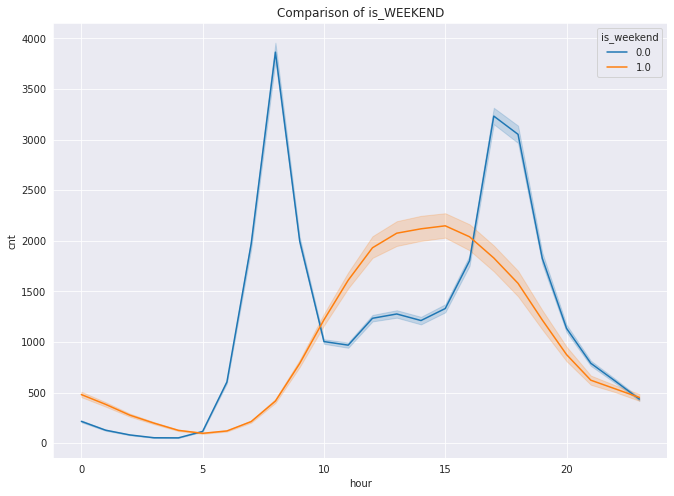

In [ ]:
# with lineplot (*whether it is a weekend or not*)
plt.figure(figsize=(11,8))
sns.lineplot('hour','cnt',data=df,hue='is_weekend')
plt.title('Comparison of is_WEEKEND')
plt.show()

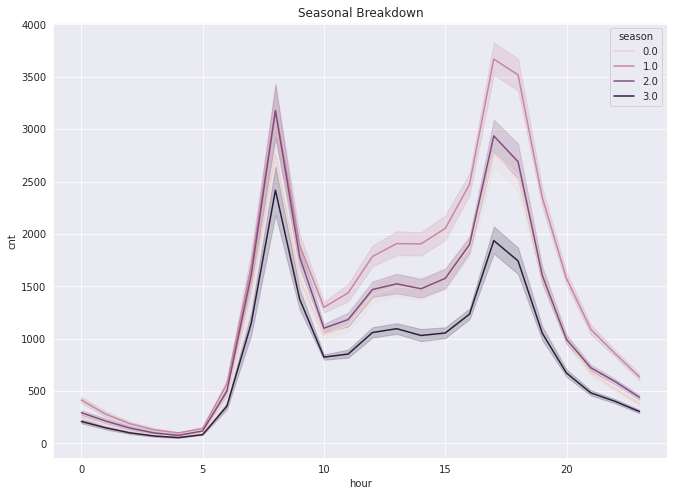

In [ ]:
# with lineplot (seasonal)
plt.figure(figsize=(11,8))
sns.lineplot('hour','cnt',data=df,hue='season')
plt.title('Seasonal Breakdown')
plt.show()

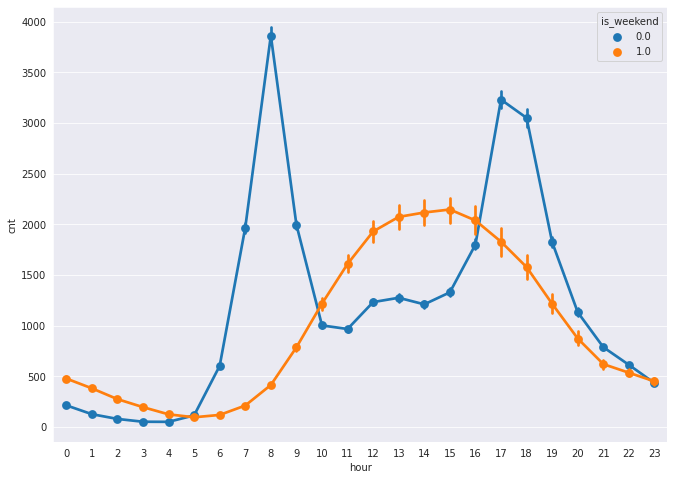

In [ ]:
# with pointplot
plt.figure(figsize=(11,8))
sns.pointplot(x="hour", y="cnt", hue="is_weekend", data=df);


# **12.Plot bike shares by day of week**
- You may want to see whether it is a holiday or not

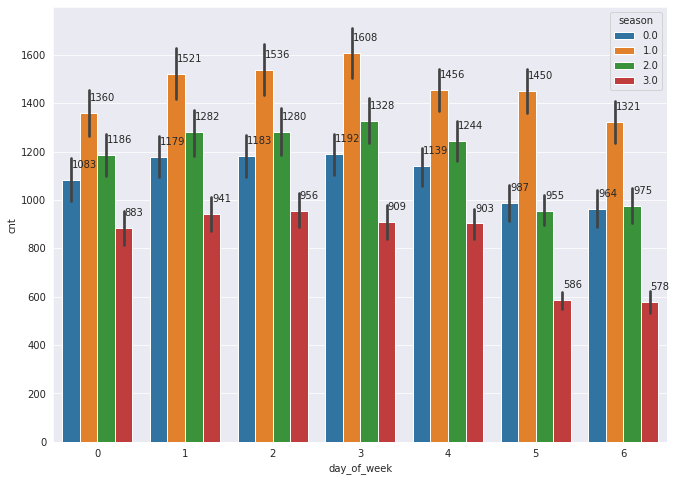

In [ ]:
# with barplot
plt.figure(figsize=(11,8))
ax = sns.barplot('day_of_week','cnt', data=df,hue='season')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.11, p.get_height()+50))
plt.show()

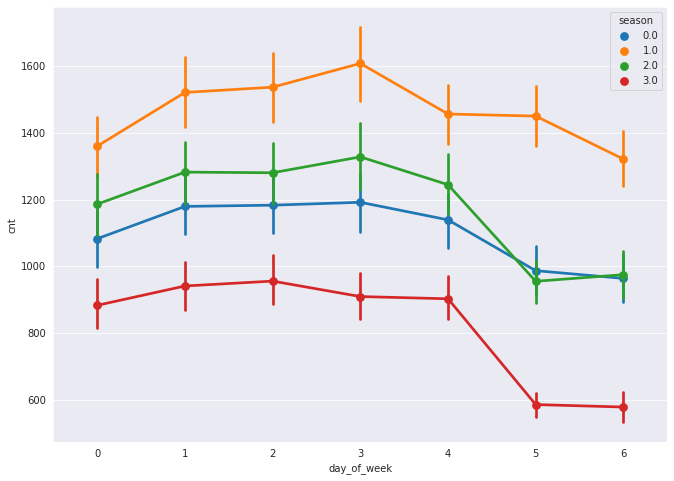

In [ ]:
# with pointplot
plt.figure(figsize=(11,8))
sns.pointplot(x="day_of_week", y="cnt", hue="season", data=df);

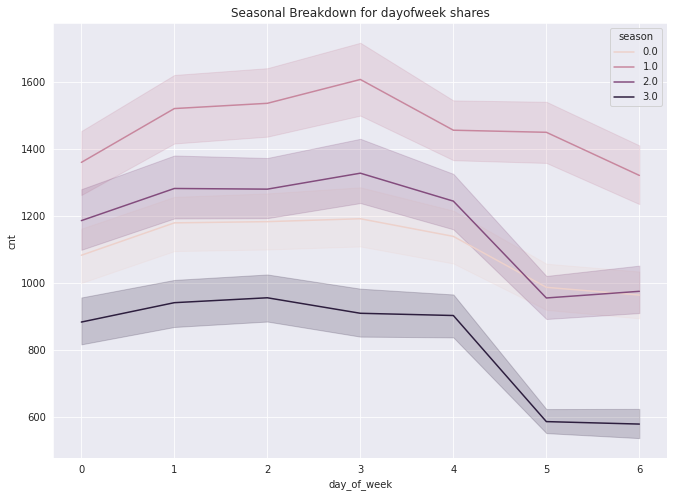

In [ ]:
plt.figure(figsize=(11,8))
sns.lineplot('day_of_week','cnt',data=df,hue='season')
plt.title('Seasonal Breakdown for dayofweek shares')
plt.show()

# **13.Plot bike shares by day of month**

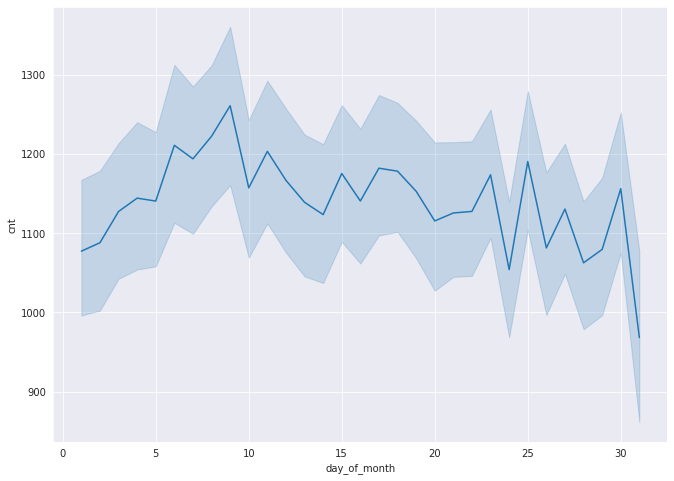

In [ ]:
#with lineplot

plt.figure(figsize=(11,8))
sns.lineplot('day_of_month','cnt',data=df)
plt.show()

# **14.Plot bike shares by year**
# **Plot bike shares on holidays by seasons**

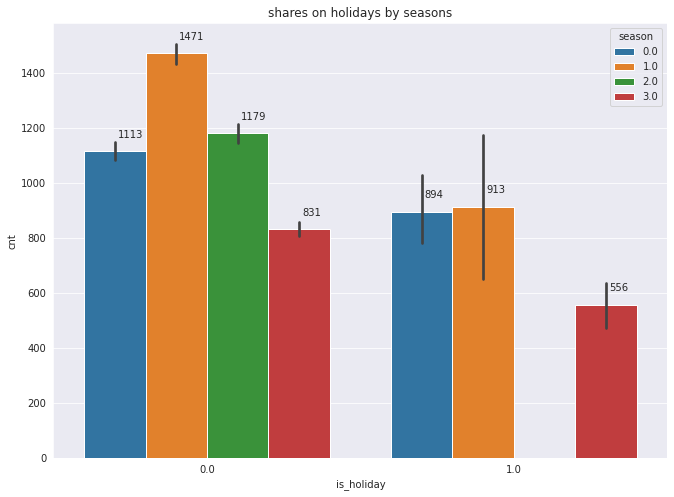

In [ ]:
# with barplot
plt.figure(figsize=(11,8))
ax = sns.barplot('is_holiday','cnt', data=df,hue='season')
plt.title('shares on holidays by seasons')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.11, p.get_height()+50))
plt.show()

# **15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot**
bike share/ weekday-weekend

In [ ]:
df.is_weekend.unique()

array([1., 0.])

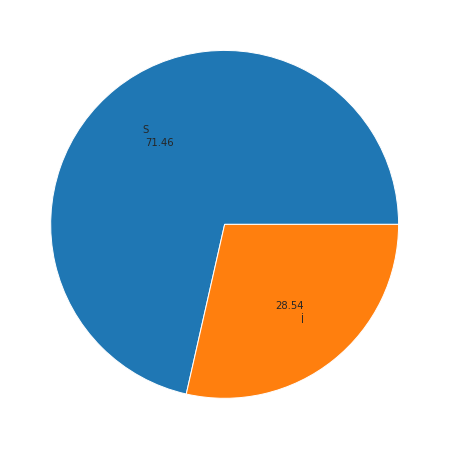

In [ ]:
# pie chart
plt.figure(figsize=(10, 8))

x = df["is_weekend"].value_counts() 
y = ["S", "İ"]
myexplode = [0.1,0,0,0]

plt.pie(x, labels=y, labeldistance=0.7, autopct="%.2f")
plt.show()

In [ ]:
df.describe(include="all")

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.00000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075,11.513265,15.751981,2.99265,6.514643
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911,6.915893,8.793704,2.00406,3.452509
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000,6.000000,8.000000,1.00000,4.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000,12.000000,16.000000,3.00000,7.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000,18.000000,23.000000,5.00000,10.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000,23.000000,31.000000,6.00000,12.000000


In [ ]:
df["is_weekend"].value_counts() 

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

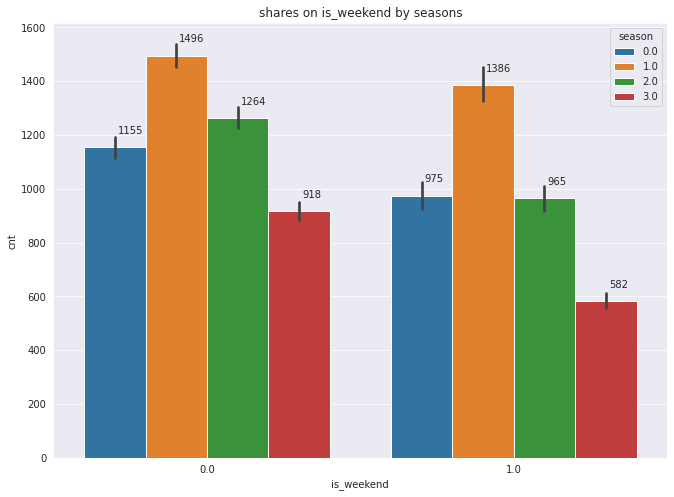

In [ ]:
# with bartplot
plt.figure(figsize=(11,8))
ax = sns.barplot('is_weekend','cnt', data=df,hue='season')
plt.title('shares on is_weekend by seasons')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.11, p.get_height()+50))
plt.show()

# **16.Plot the distribution of weather code by seasons**
weather/seasons

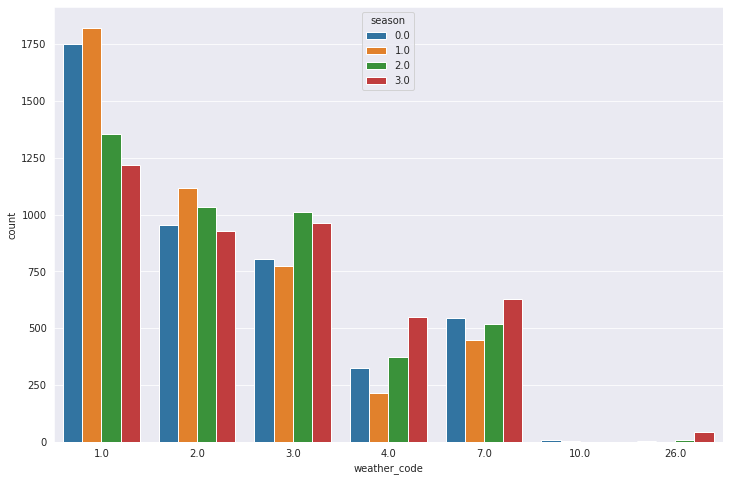

In [ ]:
# with countplot
season = df.season
weather_code = df.weather_code
plt.figure(figsize=(12, 8)) 
sns.countplot(x="weather_code", data=df, hue="season");


<Figure size 864x576 with 0 Axes>

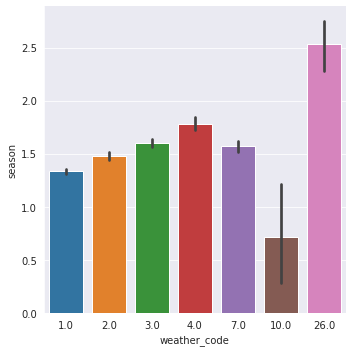

In [ ]:
# with catplot
season = df.season
weather_code = df.weather_code
plt.figure(figsize=(12, 8)) 
sns.catplot(x="weather_code", y = "season", data=df, kind="bar");


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

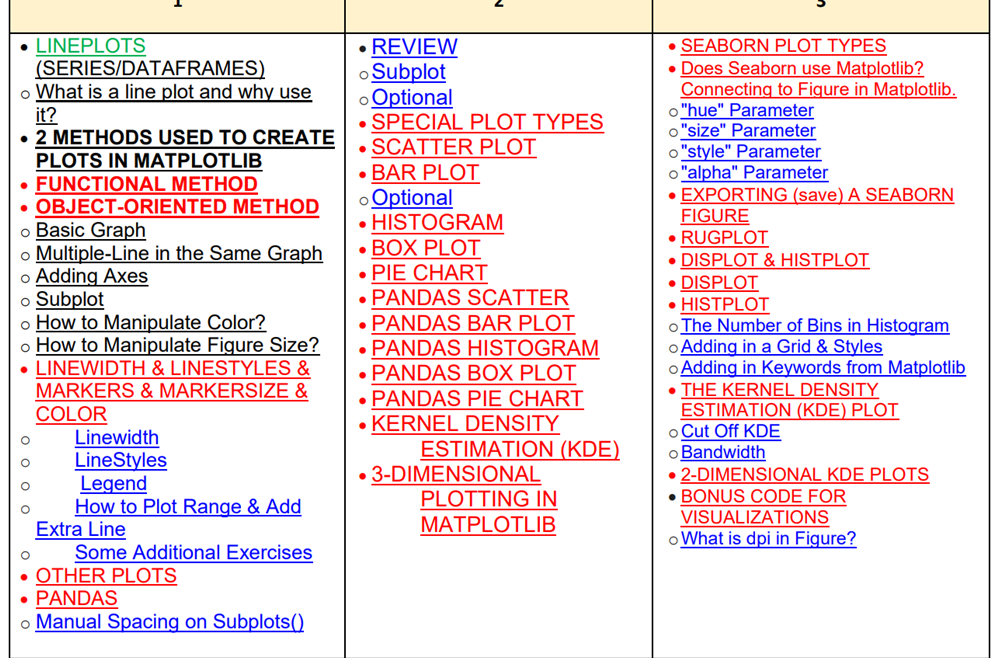

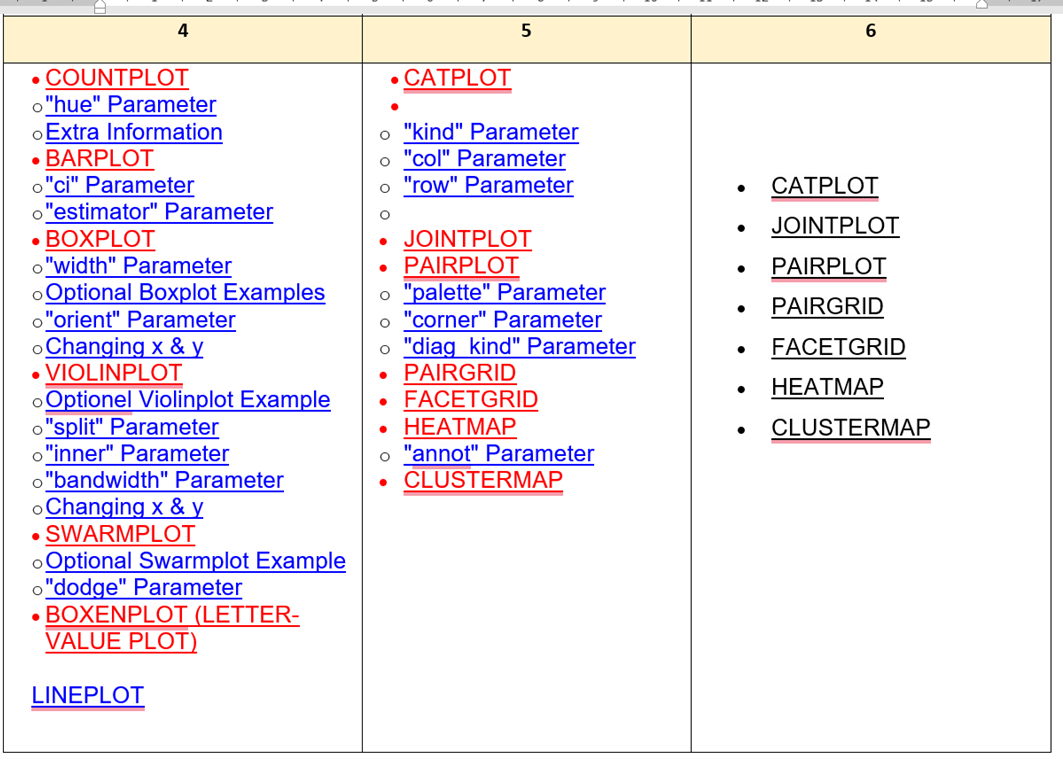